In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape

(60000, 28, 28)

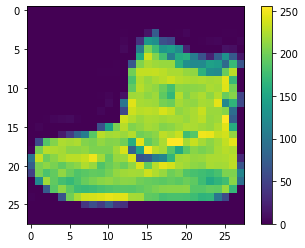

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
# plt.savefig('/home/blacklight/fashion-mnist-1.png')

In [4]:
def normalize(images):
    return images / 255.0

train_images = normalize(train_images)
test_images = normalize(test_images)

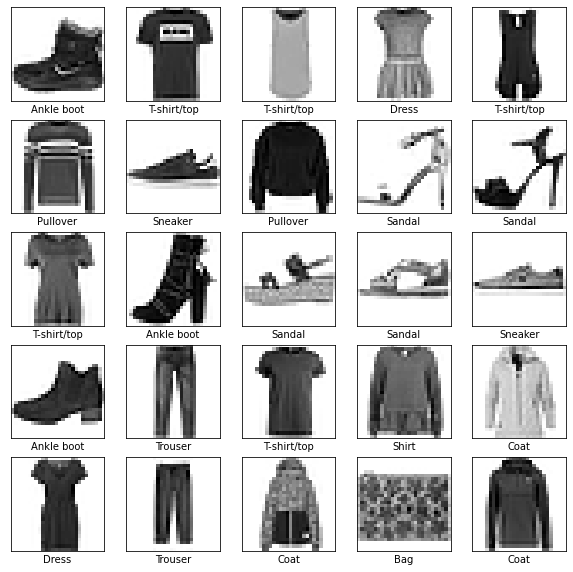

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()
# plt.savefig('/home/blacklight/fashion-mnist-2.png')

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(700, activation='sigmoid'),
    keras.layers.Dense(200, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              # loss='categorical_crossentropy',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
history = model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 1.6311 - accuracy: 0.8292

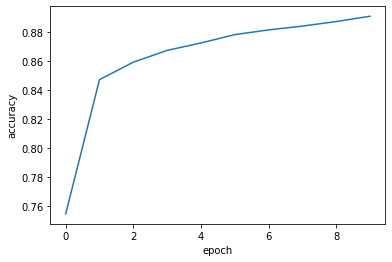

In [35]:
epochs = history.epoch
accuracy = history.history['accuracy']

fig = plt.figure()
plot = fig.add_subplot()
plot.set_xlabel('epoch')
plot.set_ylabel('accuracy')
plot.plot(epochs, accuracy)

In [48]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.5866 - accuracy: 0.8748


In [49]:
predictions = model.predict(test_images)

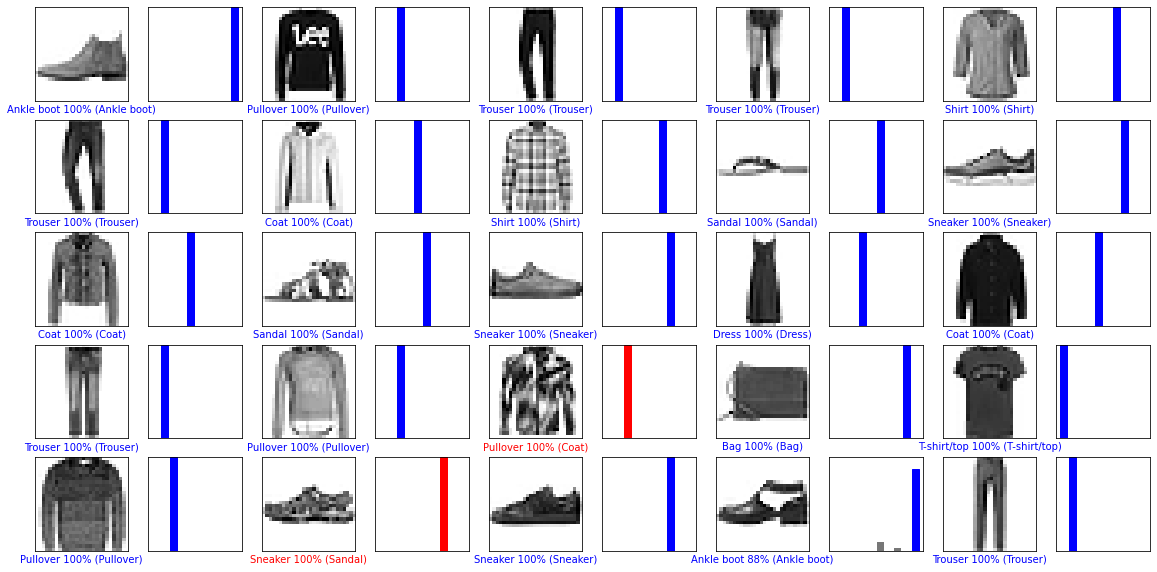

In [52]:
def plot_image_and_predictions(prediction, classes, true_label, img):
    import numpy as np
    import matplotlib.pyplot as plt

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = int(np.argmax(prediction))
    confidence = 100 * np.max(prediction)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel('{predicted} {confidence:2.0f}% ({expected})'.format(
        predicted=classes[predicted_label],
        confidence=confidence,
        expected=classes[int(true_label)]), color=color)

def plot_value_array(prediction, true_label):
    import numpy as np
    import matplotlib.pyplot as plt

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(len(prediction)), prediction, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(prediction)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
def plot_results(images, labels, predictions, classes, rows, cols):
    n_images = rows * cols
    plt.figure(figsize=(2 * 2 * cols, 2 * rows))

    for i in range(n_images):
        plt.subplot(rows, 2 * cols, 2 * i + 1)
        plot_image_and_predictions(predictions[i], classes, labels[i], images[i])
        plt.subplot(rows, 2 * cols, 2 * i + 2)
        plot_value_array(predictions[i], labels[i])

    plt.show()

plot_results(images=test_images, labels=test_labels, classes=class_names, predictions=predictions, rows=5, cols=5)

In [8]:
def model_save(model_dir, labels, overwrite=True):
    import json
    import os

    # Create the model directory if it doesn't exist
    os.makedirs(model_dir, exist_ok=True)

    # The TensorFlow model save won't keep track of the labels of your model.
    # It's usually a good practice to store them in a separate JSON file.
    labels_file = os.path.join(model_dir, 'labels.json')
    with open(labels_file, 'w') as f:
        f.write(json.dumps(list(labels)))

    # Then, save the TensorFlow model using the save primitive
    model.save(model_dir, overwrite=overwrite)


model_dir = '/home/blacklight/models/fashion-mnist'

In [22]:
model_save(model_dir, labels=class_names)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /home/blacklight/models/fashion-mnist/assets


In [9]:
def model_load(model_dir):
    import json
    import os
    from tensorflow.keras.models import load_model

    labels = []
    labels_file = os.path.join(model_dir, 'labels.json')

    if os.path.isfile(labels_file):
        with open(labels_file) as f:
            labels = json.load(f)

    m = load_model(model_dir)
    return m, labels

In [10]:
model, labels = model_load(model_dir)

